In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\classification_modules.py'>

In [69]:
# set configuration
sample_size = 1000
nr_sample = 20
num_t_steps = 1
step_size = 1 * np.pi
t = np.arange(1, num_t_steps+1) * step_size

# SVM 
test_size = 0.2
cv = 5

In [59]:
t

array([0.31415927])

### Bounded distributions

In [70]:
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample, sample_size)

In [71]:
# step_size = 0.6283185307179586
# t = np.arange(1, num_t_steps+1) * step_size

ecf_df = dem.get_ecf(bounded_samples, t)
ecf_df.head(3)

,0,1,dist
0,0.017442,0.460056,arcsine
1,-0.013017,0.454848,arcsine
2,0.052148,0.457101,arcsine


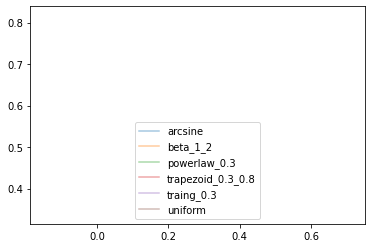

In [67]:
dem.get_ecf_plot(ecf_df,t)

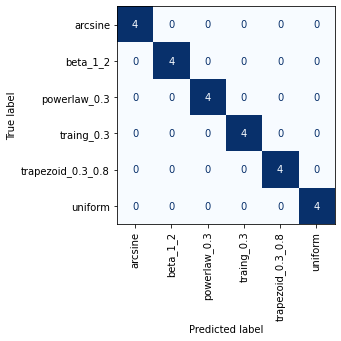

array([1.        , 1.        , 0.89473684, 1.        , 1.        ])

In [68]:
cm.svm_model(ecf_df, test_size, cv, plot=1)

In [28]:
def cv_num_steps_step_size(step_size_list, num_steps_list, dists):
    sample_dict = dm.get_samples(dists, nr_sample, sample_size)
    acc = list()

    for i in range(len(num_steps_list)):
        num_t_steps = num_steps_list[i]
        acc_ = []

        for j in range(len(step_size_list)):
            t = np.arange(1, num_t_steps+1) * step_size_list[j]
            ecf_df = dem.get_ecf(sample_dict, t)
            score = cm.svm_model(ecf_df, test_size, cv)
            acc_.append(score.mean())  
        acc.append(acc_)
    return acc

In [73]:
num_steps_list = np.arange(2,20,2)
step_size_list = np.arange(0,2,0.05)*np.pi
acc = cv_num_steps_step_size(step_size_list, num_steps_list, bounded_dists)

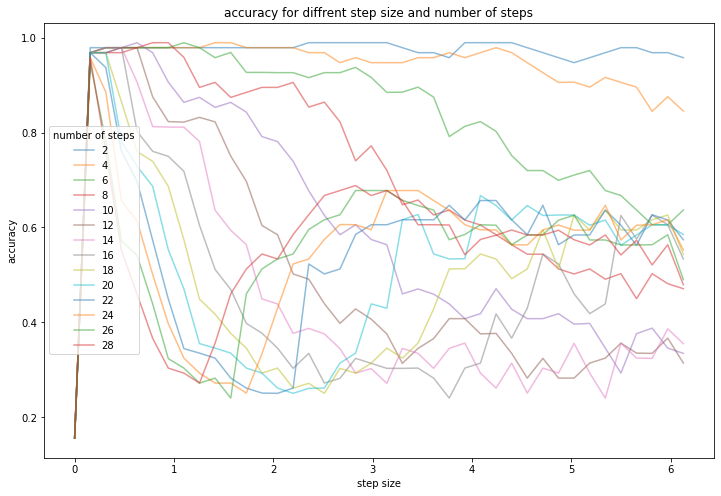

In [34]:
plt.figure(figsize=(12, 8))
for i in range(len(acc)):
    plt.plot(step_size_list, acc[i], label=str(num_steps_list[i]), alpha = 0.5)
    plt.title('accuracy for diffrent step size and number of steps')
    plt.xlabel('step size')
    plt.ylabel('accuracy')
    plt.legend(title='number of steps')
plt.show()

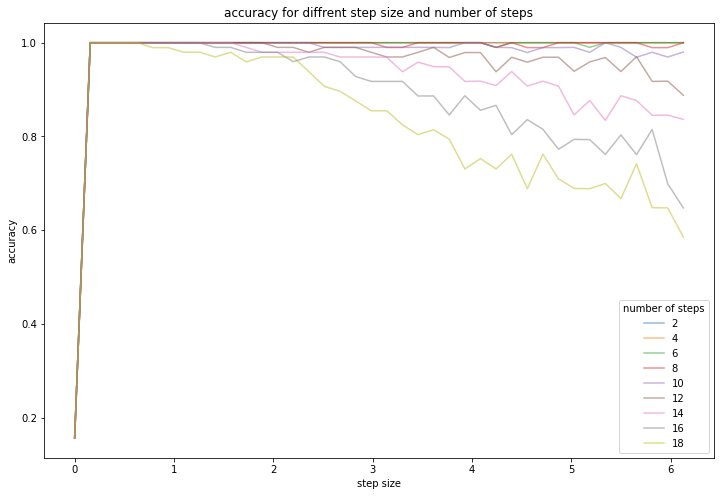

In [74]:
plt.figure(figsize=(12, 8))
for i in range(len(acc)):
    plt.plot(step_size_list, acc[i], label=str(num_steps_list[i]), alpha = 0.5)
    plt.title('accuracy for diffrent step size and number of steps')
    plt.xlabel('step size')
    plt.ylabel('accuracy')
    plt.legend(title='number of steps')
plt.show()

In [14]:
num_steps_list = [2, 4, 6]
step_size_list = np.arange(0,2,0.5)*np.pi


sample_dict = dm.get_samples(bounded_dists, nr_sample, sample_size)
acc = list()

for i in range(len(num_steps_list)):
    num_t_steps = num_steps_list[i]
    acc_ = []
    
    for j in range(len(step_size_list)):
        t = np.arange(1, num_t_steps+1) * step_size_list[j]
        ecf_df = dem.get_ecf(sample_dict, t)
        score = cm.svm_model(ecf_df, test_size, cv)
        acc_.append(score.mean())   

    
    acc.append(acc_)

### Heavytail distributions

In [147]:
heavytail_dists = dm.get_heavytail_distribution()
heavytail_samples = dm.get_samples(heavytail_dists, nr_sample, sample_size)

In [155]:
step_size = 0.471238898038469
t = np.arange(1, num_t_steps+1) * step_size

ecf_df = dem.get_ecf(heavytail_samples, t)
ecf_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,dist
0,0.682451,0.433551,0.239440,0.154420,0.057537,-0.045637,-0.015026,0.030340,-0.046041,0.027113,...,0.434131,0.417946,0.423324,0.400620,0.318261,0.150946,0.153769,0.114164,0.073315,cauchy
1,0.697345,0.388234,0.273813,0.134853,0.109774,0.056767,0.029867,0.028934,0.087342,0.193131,...,0.469495,0.385377,0.353401,0.304445,0.219604,0.204666,0.122342,0.024878,0.133238,cauchy
2,0.542485,0.355993,0.326196,0.231245,0.100162,0.030134,0.027184,0.002455,0.100036,-0.012716,...,0.265419,0.358422,0.373690,0.363605,0.263678,0.233907,0.194400,0.231794,0.199210,cauchy


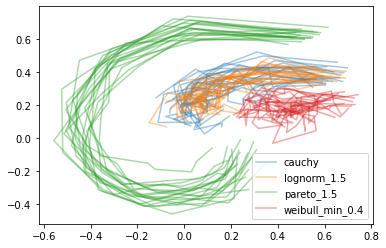

In [156]:
dem.get_ecf_plot(ecf_df, t)

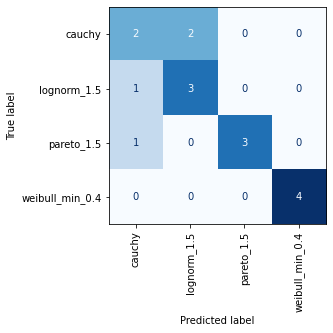

array([0.76923077, 0.61538462, 0.61538462, 0.69230769, 0.83333333])

In [157]:
cm.svm_model(ecf_df, test_size, cv, plot=1)

0.471238898038469

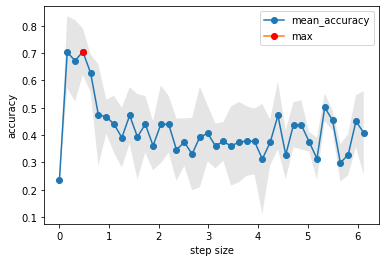

In [172]:
step_size = np.arange(0,2,0.05)*np.pi
cross_val_step_size(step_size, heavytail_samples)

In [171]:
def cross_val_step_size(step_size, sample_dict):
    acc = []
    sd = []

    for i in step_size:
        t = np.arange(1, num_t_steps+1) * i
        ecf_df = dem.get_ecf(sample_dict, t)
        score = cm.svm_model(ecf_df, test_size, cv)
        acc.append(score.mean())   
        sd.append(score.std())

    ax = plt.gca()
    plt.xlabel('step size')
    plt.ylabel('accuracy')
    plt.legend()
    
    return step_size_l[acc.index(max(acc))]

In [1]:
for i in range(2,2):
    print(i)

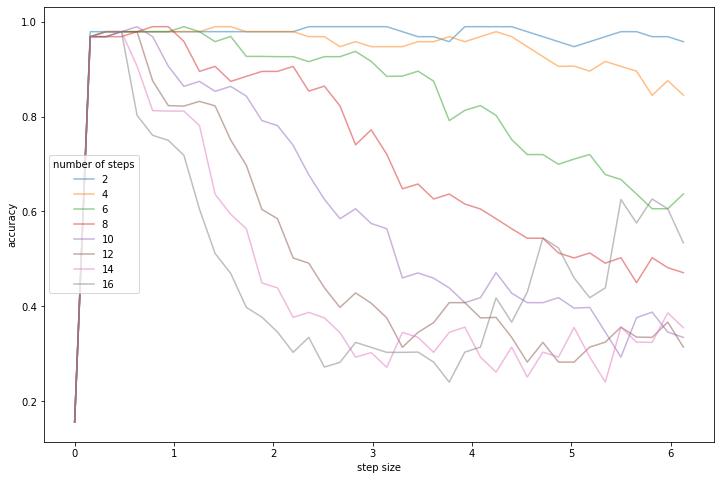

In [226]:
plt.figure(figsize=(12, 8))
ax = plt.gca()
for i in range(len(acc)):
    plt.plot(step_size, acc[i], label=num_steps[i], alpha =0.5)

plt.xlabel('step size')
plt.ylabel('accuracy')

plt.legend(title='number of steps')
plt.show()
    

In [248]:
max_list = []
for accuracy in acc:
    max_list.append(max(accuracy))

In [256]:
t

array([ 6.12610567, 12.25221135, 18.37831702, 24.5044227 , 30.63052837,
       36.75663405, 42.88273972, 49.0088454 , 55.13495107, 61.26105675])

In [265]:
num_t_steps = 10
step_size = 0.1*np.pi
t = np.arange(1, num_t_steps+1) * step_size
t

array([0.31415927, 0.62831853, 0.9424778 , 1.25663706, 1.57079633,
       1.88495559, 2.19911486, 2.51327412, 2.82743339, 3.14159265])

In [258]:
np.arange(0,2,0.05)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95])

In [169]:
def cross_val_num_steps(num_steps, sample_dict, method):
    acc_mean = []
    acc_std = []
    
    for i in num_steps:
        if method == 'edf':
            x = np.linspace(0,1,i)
            df = dem.get_edf(sample_dict, x)
            
        elif method == 'ecf':
            t = np.arange(1, num_t_steps+1) * i
            df = dem.get_ecf(sample_dict, t)
            
        else:
            df = dem.get_kde(sample_dict, x)
            
        score = cm.svm_model(df, test_size, cv)
        acc_mean.append(score.mean())
        acc_std.append(score.std())
        
    ax = plt.gca()
    plt.plot(num_steps, acc_mean, label='mean accuracy')

    plt.gca().fill_between(num_steps,
                           [i-j for i,j in zip(acc_mean, acc_std)], 
                           [i+j for i,j in zip(acc_mean, acc_std)],
                           facecolor='gray', 
                           alpha=0.2)
    
    plt.plot(num_steps[acc.index(max(acc))], max(acc), marker='o', markeredgecolor='red', markerfacecolor='red', label='max')

    plt.xlabel('number of steps')
    plt.ylabel('accuracy')
    plt.legend()
    
    return num_steps[acc.index(max(acc))]

0.3141592653589793

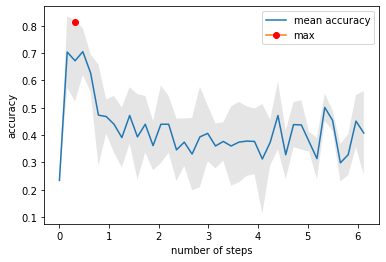

In [170]:
step_size = np.arange(0,2,0.05)*np.pi
cross_val_num_steps(step_size, heavytail_samples, 'ecf')